In [1]:
%run ../Utils/FGindex_function.ipynb
%run ../Utils/portfolio_metrics.ipynb
%run ../Utils/Backtesting_function.ipynb

In [2]:
from pykrx import stock
from pykrx import bond

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from operator import itemgetter
from datetime import date, datetime
import time

# analysis output

In [6]:
final_result_df = pd.read_csv("index_final_result.csv")

In [7]:
up_df = final_result_df[final_result_df['per'] > 1]
same_df = final_result_df[final_result_df['per'] == 1]
down_df = final_result_df[final_result_df['per'] < 1]

61 10 17


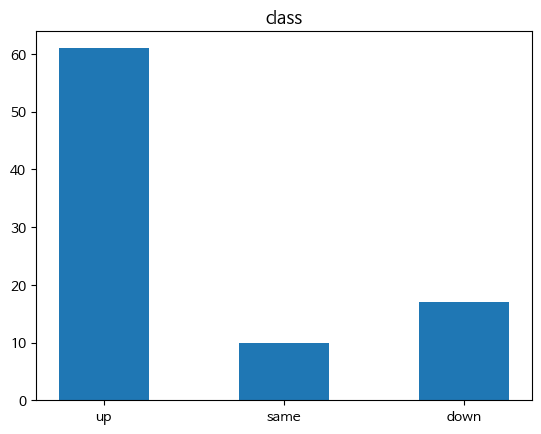

In [8]:
x = range(3)
port = ["up","same","down"]
print(len(up_df),len(same_df),len(down_df))
plt.bar(x,[len(up_df),len(same_df),len(down_df)],width = 0.5)
plt.xticks(x,["up","same","down"])
plt.title("class")
plt.show()


In [9]:
ar = final_result_df.per
mul = 1
for item in ar:
    mul = mul*item
GM = mul ** (1/len(ar))
print("기하 평균 =", GM)

기하 평균 = 1.5522871524262931


1
1.5522871524262931


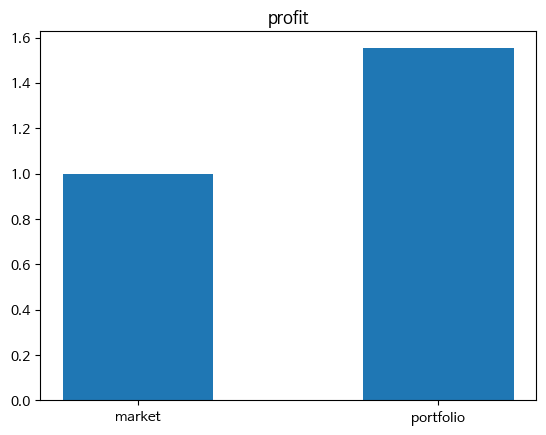

In [10]:
market_score = 1
best_score = GM
print(market_score)
print(best_score)

x = range(2)
plt.bar(x,[market_score, best_score],width = 0.5)
plt.xticks(x,["market","portfolio"])
plt.title("profit")
plt.show()


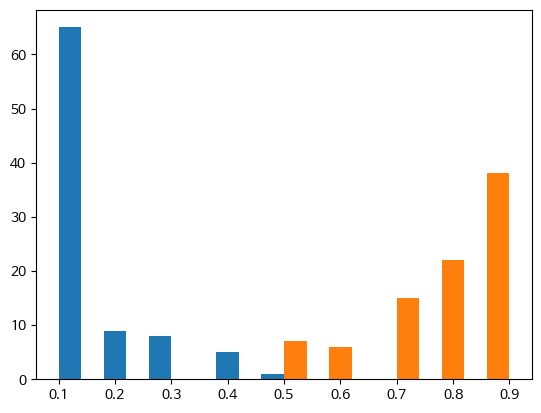

In [11]:
plt.hist(final_result_df.buying_point, bins = 10)
plt.hist(final_result_df.selling_point, bins = 10)
plt.show()

# multi index metric

In [12]:

beta_list = []
sharp_list = []
sortino_list = []
MDD_list = []

for i in final_result_df.index:
    print(final_result_df.ticker[i])
    
    # data read
    stock = pd.read_csv("../DATA/data_FGscore/{}.csv".format(final_result_df.ticker[i]))
    stock.columns = ["index",'datetime','close','volume','multiple_volume','per','Volatility_list','Volume_list','S1_score','S2_score','FG_score']
    stock = stock.sort_values("datetime").reset_index(drop=True)
    
    # backtesting
    portfolio_result, anomaly_list = back_testing(stock,
                                                  buying_score = final_result_df.buying_point[i],
                                                  selling_score = final_result_df.selling_point[i],
                                                  print_type = False)
    
    # plot image
    if len(anomaly_list) >  0:
        # data process
        stock['simul'] = portfolio_result
        datetime_list = [datetime.strptime(i,"%Y-%m-%d").date() for i in stock.datetime]
        stock["datetime"] = datetime_list
        
        tmp1 = beta_func(stock)
        tmp2 = sharp_func(stock)
        tmp3 = sortino_func(stock)
        tmp4 = MDD_func(stock)
        
        beta_list.append((tmp1[0] - tmp1[1])/tmp1[0])
        sharp_list.append((tmp2[0] - tmp2[1])/tmp2[0])
        sortino_list.append((tmp3[0] - tmp3[1])/tmp3[0])
        MDD_list.append((tmp4[0] - tmp4[1])/tmp4[0])

    else:
        beta_list.append(0)
        sharp_list.append(0)
        sortino_list.append(0)
        MDD_list.append(0)
        

1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1024
1025
1026
1027
1028
1034
1035
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1167
1182
1224
1227
1232
1244
2001
2002
2003
2004
2012
2015
2024
2026
2027
2029
2031
2037
2041
2042
2043
2056
2058
2062
2063
2065
2066
2067
2068
2070
2072
2074
2075
2077
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2181
2182
2183
2184


In [13]:
print(np.mean(beta_list))
print(np.mean(sharp_list))
print(np.mean(sortino_list))
print(np.mean(MDD_list))

0.3692347666785043
-0.9850400838310235
-1.0951582434021303
0.2255980723628161


In [14]:
print(np.std(beta_list))
print(np.std(MDD_list))

0.6281781478202373
0.2727577018881918


1
0.6307652333214957


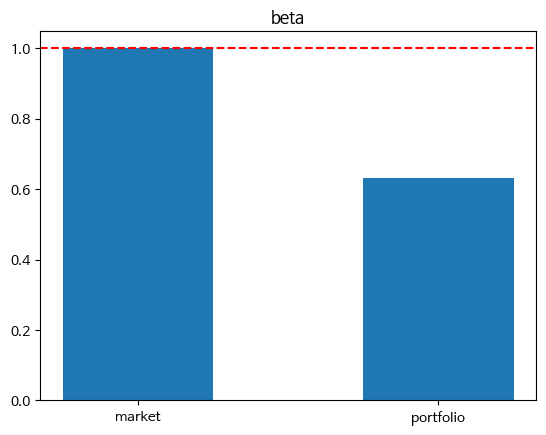

In [15]:
market_score = 1
best_score = 1-np.mean(beta_list)
print(market_score)
print(best_score)

x = range(2)
plt.bar(x,[market_score, best_score],width = 0.5)
plt.axhline(y=1,color='red',linestyle='--')
plt.xticks(x,["market","portfolio"])
plt.title("beta")
plt.show()


1
0.7744019276371839


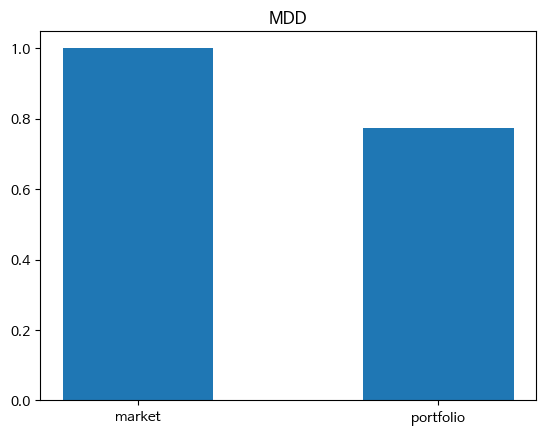

In [16]:
market_score = 1
best_score = 1-np.mean(MDD_list)
print(market_score)
print(best_score)

x = range(2)
plt.bar(x,[market_score, best_score],width = 0.5)
plt.xticks(x,["market","portfolio"])
plt.title("MDD")
plt.show()


In [17]:
# beta, mdd
beta2 = 1 - np.mean(beta_list)
MDD2 = 1 - np.mean(MDD_list)

# close score
market_score = 1
best_score = GM
print(market_score)
print(best_score)
m = market_score/market_score
b = best_score/market_score

# sharp score
sharp_total = 1 / 1
sharp_port = b / beta2


1
1.5522871524262931


In [18]:
print(sharp_total, sharp_port)

1.0 2.4609586426509744


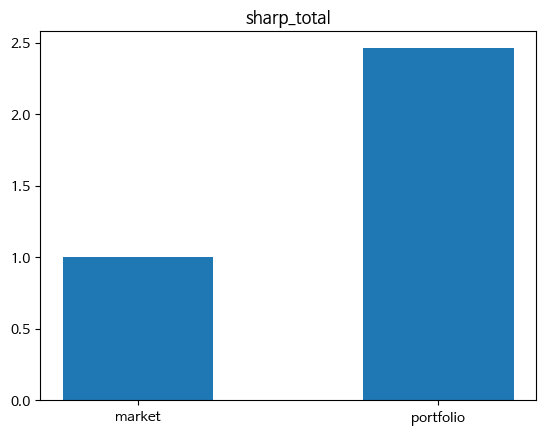

In [19]:
x = range(2)
plt.bar(x,[sharp_total, sharp_port],width = 0.5)
plt.xticks(x,["market","portfolio"])
plt.title("sharp_total")
plt.show()
